# Van der Waals interactions

The cell below contains experimental data for the van der Waals force $F/R$ (in units of $\mu N/m$) as a function of separation $d$ (in nm) between two curved mica surfaces of radius $R\approx 1cm$ in solution.

Source: Israelachvili and Adams, J. Chem. Soc. Faraday Trans. 74, 975 (1978)

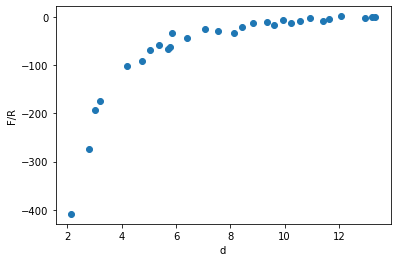

In [8]:
import numpy
from matplotlib import pyplot as plt

d, force_over_R = numpy.loadtxt('data/mica_surface.txt', unpack=True)
plt.xlabel('d')
plt.ylabel('F/R')
plt.plot(d, force_over_R, 'o')

Our goal is to fit these data to the expressions seen in class. You can use the function `curve_fit()` defined in `scipy.optimize`, see the `fit.ipynb` notebook.

**Exercise 1**: *forces between mica surfaces*

1. Fit the above experimental data using the expressions for the vdW force between 
- two spheres at close contact ($d \rightarrow 0$)
- two planar surfaces at a distance $d$, each one bounding a semi-infinite medium

Which one fits the data best? Can you estimate the value of the Hamaker constant $A$?

2. Consider the deviations of the experimental data from the above fits at large distances ($d > 8 nm$). How can you account for these deviations?

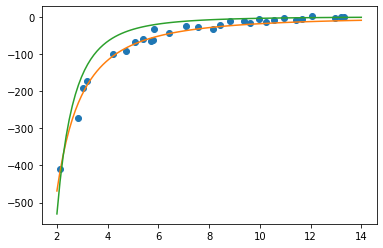

In [9]:
from scipy.optimize import curve_fit

def spheres(x, a):
    return - a /12/x**2

def surfaces(x, a):
    return - a/6/numpy.pi/x**3

xdata = numpy.linspace(2, 14, 100)


u_spheres = spheres(xdata, 22502)
u_surfaces = surfaces(xdata, 80000)
plt.plot(d, force_over_R, 'o')
plt.plot(xdata, u_spheres)
plt.plot(xdata, u_surfaces)

Fit con potenziale tra 2 sfere di raggio r:

Hamaker constant times radius is A*r = 22502.650254768505


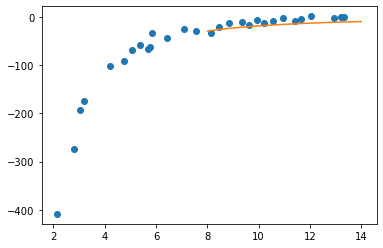

In [81]:
# Fit and plot
plt.plot(d, force_over_R, 'o', label='data')
popt, pcov = curve_fit(spheres, d, force_over_R)
# Note the *popt syntax unpacks the array into individual variables
plt.plot(xdata, spheres(xdata, *popt), '-')
print("Hamaker constant times radius is A*r =", popt[0])

Fit con potenziale tra 2 superfici planari:

Hamaker constant is A = 87528.53313031475


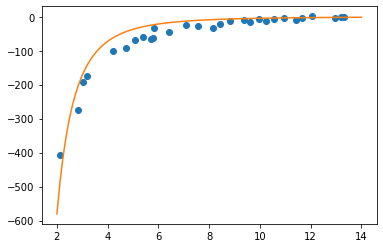

In [78]:
# Fit and plot
plt.plot(d, force_over_R, 'o', label='data')
popt, pcov = curve_fit(surfaces, d, force_over_R)
# Note the *popt syntax unpacks the array into individual variables
plt.plot(xdata, surfaces(xdata, *popt), '-')
print("Hamaker constant is A =", popt[0])

3. Le deviazioni nel comportamento a grandi distanze ($d > 8 nm$) possono essere dovute al fatto che si è usata l'espressione limite per $d \rightarrow 0$ nel caso del potenziale tra 2 sfere:

(-50.0, 10.0)

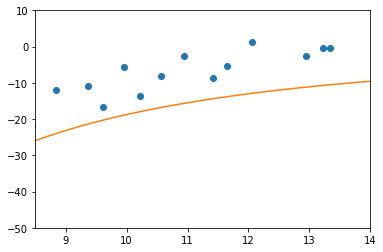

In [98]:
xdata = numpy.linspace(8,14,100)
popt, pcov = curve_fit(spheres, d, force_over_R)
plt.plot(d, force_over_R, 'o', label='data')
plt.plot(xdata, spheres(xdata, *popt), '-')
plt.xlim([8.5,14])
plt.ylim([-50,10])

mentre nel caso del potenziale tra 2 superfici c'è un buon accordo:

(-50.0, 10.0)

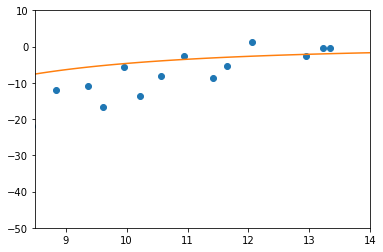

In [97]:
xdata = numpy.linspace(8,14,100)
popt, pcov = curve_fit(surfaces, d, force_over_R)
plt.plot(d, force_over_R, 'o', label='data')
plt.plot(xdata, surfaces(xdata, *popt), '-')
plt.xlim([8.5,14])
plt.ylim([-50,10])

# DLVO potential

The Derjaguin-Landau-Verwein-Overbeek potential between two colloidal particles of radius $R$ reads 
$$
U(r) = U_{vdw}(r) + U_{el}(r)
$$
for $r>\sigma=2R$. The expressions for $U_{vdw}(r)$ and $U_{el}(r)$ are those seen in class. The cell below provides the skeleton to implement this potential.

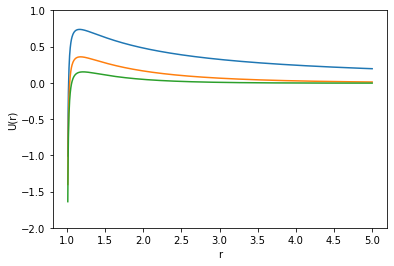

In [2]:
import numpy
from matplotlib import pyplot as plt

r = numpy.linspace(1.01,5.0,1000)

def u_vdw(r, A, sigma):
    # Skeleton of small r behavior
    return - A / (r-sigma)  

def u_el(r, K):
    # Skeleton of Yukawa potential
    return numpy.exp(-K*r) / r
    
plt.xlabel('r')
plt.ylabel('U(r)')
plt.ylim(bottom=-2)
#plt.plot(r, u_vdw(r, A=0.02, sigma=1.0))
plt.plot(r, u_el(r, K=0.0) + u_vdw(r, A=0.02, sigma=1.0))
plt.plot(r, u_el(r, K=0.5) + u_vdw(r, A=0.02, sigma=1.0))
plt.plot(r, u_el(r, K=1.0) + u_vdw(r, A=0.02, sigma=1.0))

**Exercise 1**: *charge stabilization*

1. Plot the *full* DLVO potential for a range of values of the Debye screening length and identify the values for which the barrier against aggregation exceeds $k_BT$ at room temperature. Consider realistic values for a colloidal suspension: Hamaker constant $A=10^{-20} J$, colloid radius $R=10^{-6} m$, colloid charge $Q=10^3 e$, solvent dieletric permettivity $\varepsilon=80 \varepsilon_0$. 


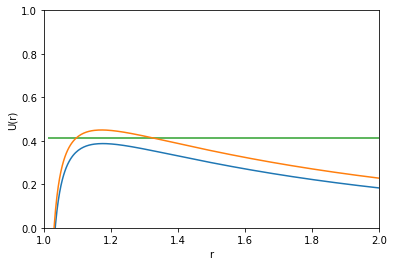

In [3]:
plt.xlabel('r')
plt.ylabel('U(r)')
plt.ylim(bottom=-2)
#plt.plot(r, u_vdw(r, A=0.02, sigma=1.0))
plt.hlines(0.411, xmin=r[0], xmax=r[-1], colors='C2')  # kT at room temperature
plt.xlim([1,2])
plt.ylim([0,1])
plt.plot(r, u_el(r, K=0.45) + u_vdw(r, A=0.02, sigma=1.0))
plt.plot(r, u_el(r, K=0.35) + u_vdw(r, A=0.02, sigma=1.0))

quindi il valore critico di $K_{D}$ è circa 0.4

# Depletion interaction

The Asakura-Oosawa potential describes the depletion interaction between two colloidal particles of radius $R$ at a distance $r$ in a solvent of depletant molecules of (effective) diameter $\sigma$. It reads
$$
U_{AO}(r) = - \rho k_B T \left(1 - \frac{3r}{2D} + \frac{r^3}{2D^3}\right)
$$
where $D=2R + \sigma$ and $\rho$ is the number density.

The cell below contains data for the depletion potential in units of $k_B T$ between two silica between silica particles in a $\lambda$-DNA solvent. The depletant molecules $\lambda$-DNA have a concentration $x=60 \mu g/m\ell$. The distance between the spheres is measured in $\mu m$.

Source: [Verma et al. PRL 81, 4004 (1998)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.81.4004)

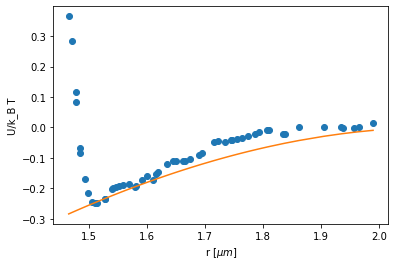

In [4]:
import numpy
from matplotlib import pyplot as plt
r, U = numpy.loadtxt('data/depletion-60.txt', unpack=True)

def AO(r, P, D):
    #D = 2*R + sigma
    return - P * (1 - 1.5 * r / D + 0.5 * r**3 / D**3)

plt.xlabel('r [$\mu m$]')
plt.ylabel('U/k_B T')
plt.plot(r, U, 'o')
plt.plot(r, AO(r, P=2.3, D=2.1))

**Exercise 1**

Fit the depletion interaction data given above to the Asakura-Oosawa functional form and repeat the analysis for the three files `depletion-10.txt`, `depletion-60.txt` and `depletion-280.txt`, which correspond to depletant concentrations $x=10, 60, 280 \mu g/m\ell$, respectively. They are all in the `data/` folder.
1. Estimate the typical size $\sigma$ of the depletant molecules
2. How does the strength of the depletion interaction depend on depletant density $\rho$? (assume the molecular weight is constant)
3. Can you explain the origin of the repulsive part of the potential? You may want to read the original paper to check how the potential has been measured [Verma et al. PRL 81, 4004 (1998)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.81.4004).

rho = 1.750944237382121 
2R + sigma = 2.0065342666862094


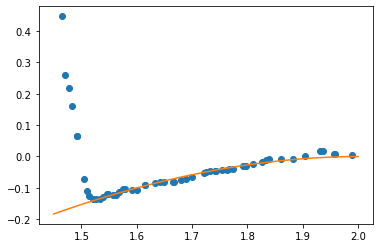

In [10]:
# Fit and plot
r, U = numpy.loadtxt('data/depletion-10.txt', unpack=True)
plt.plot(r, U, 'o', label='data')
popt, pcov = curve_fit(AO, r[10:], U[10:], p0=[2.3, 2.1])
xdata = numpy.linspace(1.45,2,100)
# Note the *popt syntax unpacks the array into individual variables
plt.plot(xdata, AO(xdata, *popt), '-')
print("rho =", popt[0], "\n2R + sigma =", popt[1])

rho = 3.9617405499567906 
2R + sigma = 1.9195812477842895


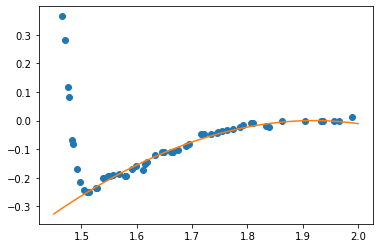

In [11]:
# Fit and plot
r, U = numpy.loadtxt('data/depletion-60.txt', unpack=True)
plt.plot(r, U, 'o', label='data')
popt, pcov = curve_fit(AO, r[10:], U[10:], p0=[2.3, 2.1])
xdata = numpy.linspace(1.45,2,100)
# Note the *popt syntax unpacks the array into individual variables
plt.plot(xdata, AO(xdata, *popt), '-')
print("rho =", popt[0], "\n2R + sigma =", popt[1])

rho = 217.10873903640132 
2R + sigma = 1.7084213409311892


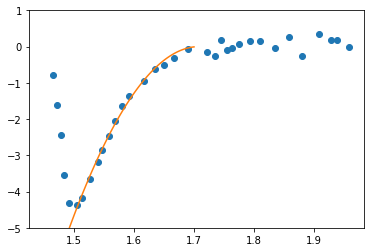

In [17]:
# Fit and plot
r, U = numpy.loadtxt('data/depletion-280.txt', unpack=True)
plt.plot(r, U, 'o', label='data')
popt, pcov = curve_fit(AO, r[5:20], U[5:20], p0=[2.3, 2.1])
xdata = numpy.linspace(1.45,1.7,100)
# Note the *popt syntax unpacks the array into individual variables
plt.plot(xdata, AO(xdata, *popt), '-')
plt.ylim([-5,1])
print("rho =", popt[0], "\n2R + sigma =", popt[1])